# Example Usage

In [1]:
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

In [2]:
import chalc.chromatic as chromatic
from chalc.sixpack import SubChromaticInclusion, SixPack
from chalc.plotting import plot_sixpack, plot_diagram, draw_filtration, animate_filtration
import numpy as np
import matplotlib.pyplot as plt

In [3]:
plt.rcParams["animation.html"] = "jshtml"

## Computing chromatic filtrations
For our data we sample 100 points on a circle with some noise and 100 points from inside the unit disk.

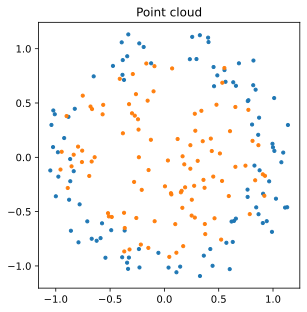

In [4]:
rng = np.random.default_rng(40)
num_points_circle = 100
num_points_disk = 100
mean = [0, 0]
cov = np.eye(2)*0.01
circle = np.array([[np.sin(2*np.pi*t), np.cos(2*np.pi*t)] for t in rng.random(num_points_circle)]).T +\
    rng.multivariate_normal(mean, cov, num_points_circle).T # points as columns
disk = np.sqrt(rng.random(num_points_disk)) * np.array([[np.sin(2*np.pi*t), np.cos(2*np.pi*t)] for t in rng.random(num_points_disk)]).T
points = np.concatenate((circle, disk), axis=1)
plt.scatter(circle[0, :], circle[1, :], s=10)
plt.scatter(disk[0, :], disk[1, :], s=10)
plt.gca().set_aspect('equal')
colours = [0]*num_points_circle + [1]*num_points_disk
plt.title('Point cloud')
plt.show()

In [5]:
chromatic_alpha_filt  = chromatic.alpha(points, colours)
print(f'\'chromatic_alpha_filt\' has {len(chromatic_alpha_filt.simplices[1])} 1-simplices and {len(chromatic_alpha_filt.simplices[2])} 2-simplices.')

'chromatic_alpha_filt' has 954 1-simplices and 1312 2-simplices.

In [ ]:
# __len__()
print(f'\'chromatic_alpha_filt\' has {len(chromatic_alpha_filt)} simplices and {chromatic_alpha_filt.num_vertices} vertices.')
print(f"Dimension of the filtration: {chromatic_alpha_filt.dimension}.")

facets = []
# __iter__()
for simplex in chromatic_alpha_filt:
    # Do something with the simplex
    if simplex.dimension == 2:
        print(f"Found a simplex of dimension {simplex.dimension} with vertices {simplex.vertices} and colours {simplex.colours}")
        # Get a list of handles to the facets of the simplex
        facets = simplex.facets
        break

if facets:
    verts = facets[0].vertices
    # __contains__()
    if verts in chromatic_alpha_filt:
        print(f"{verts} is a simplex in the filtration.")
    else:
        print(f"{verts} is not a simplex in the filtration.")

'chromatic_alpha_filt' has 3023 simplices and 200 vertices.

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
draw_filtration(chromatic_alpha_filt, points, time=0.3, include_colours=[0], ax=ax[0])
ax[0].set_title('Colour 0')
draw_filtration(chromatic_alpha_filt, points, time=0.3, include_colours=[1], ax=ax[1])
ax[1].set_title('Colour 1')
draw_filtration(chromatic_alpha_filt, points, time=0.3, ax=ax[2])
ax[2].set_title('Both colours')
for i in range(3):
    ax[i].set_xlim(-1.2, 1.2)
    ax[i].set_ylim(-1.2, 1.2)
fig.suptitle('Complexes at $t=0.3$')
plt.tight_layout()
plt.show()

## Computing 6-packs of persistence diagrams

In [ ]:
# Using the previously computed filtration:
dgms_alpha = SubChromaticInclusion(chromatic_alpha_filt, {0}).sixpack()
# Using the Delaunay--Čech and Delaunay--Rips filtrations
chromatic_delcech_filt = chromatic.delaunay_cech(points, colours)
chromatic_delrips_filt = chromatic.delaunay_rips(points, colours)
dgms_delcech = SubChromaticInclusion(chromatic_delcech_filt, {0}).sixpack()
dgms_delrips = SubChromaticInclusion(chromatic_delrips_filt, {0}).sixpack()

In [ ]:
print(f"The diagram names are: {list(dgms_alpha.keys())}")

# Iterate over the diagrams like in a dictionary.
for diagram_name in dgms_alpha:
    print(diagram_name)
    # do something with dgms_alpha[diagram_name]

# Access individual diagrams by indexing.
ker = dgms_alpha['ker']

In [ ]:
print(dgms_alpha["ker"])

In [ ]:
# __bool__()
print("The kernel is non-empty." if dgms_alpha["ker"] else "The kernel is empty.")
# Or you can use bool(dgms_alpha.ker).

# __len__()
# Get the number of features in the diagram
print(f"The cokernel has {len(dgms_alpha['cok'])} features.")

# __contains__()
# Check if a feature exists in a diagram.
print("The domain contains a feature represented by the simplex pair (20, 40): "
      f"{(20, 40) in dgms_alpha["dom"]}")

# __iter__()
# Iterate over the paired and unpaired simplices.
for feature in dgms_alpha['ker']:
    if isinstance(feature, tuple):
        sigma, tau = feature
        # Do something with a pair of simplices.
        ...
    else:
        sigma = feature
        # Do something with an unpaired simplex.
        ...

# The paired and unpaired simplices can be considered separately.
print("The \"paired\" property of the kernel has type: "
      f"{type(dgms_alpha['ker'].paired)}")

print("The \"unpaired\" property of the kernel has type: "
      f"{type(dgms_alpha['ker'].unpaired)}")

for sigma, tau in dgms_alpha['ker'].paired:
    # Do something with paired simplices.
    ...

for sigma in dgms_alpha['dom'].unpaired:
    # Do something with unpaired simplices.
    ...

In [ ]:
np.set_printoptions(threshold=10)
# Get the domain in dimension zero.
print(dgms_alpha.get_matrix('dom', 0))
# Get the kernel in dimensions zero and one.
print(dgms_alpha.get('ker', [0, 1]))
# Get the kernel in all dimensions from zero to max(dgms_alpha.dimensions).
print(dgms_alpha.get('ker'))

In [ ]:
print(dgms_alpha.entrance_times)
print(dgms_alpha.dimensions)

## Plotting 6-packs of persistence diagrams

In [ ]:
fig1, ax1 = plot_sixpack(dgms_alpha, threshold = 1e-3, truncations=0.5)
fig1.suptitle('Chromatic Alpha')
fig1.set_figwidth(15)
fig1.set_figheight(9)
fig1.subplots_adjust(top=0.92)
plt.show()
fig2, ax2 = plt.subplots(1, 3)
# You can specify the dimensions of features to include in the plot.
plot_diagram(dgms_alpha, 'rel', dimensions = {0, 2}, truncation = 0.5, ax = ax2[0], threshold = 1e-3)
ax2[0].set_title('Chromatic Alpha')
# You can also specify a single dimension as an integer.
plot_diagram(dgms_delcech, 'rel', dimensions = 1, truncation = 0.5, ax = ax2[1], threshold = 1e-3)
ax2[1].set_title('Chromatic Delaunay-Čech')
# If no dimensions are specified, all features will be included.
plot_diagram(dgms_delrips, 'rel', truncation = 0.5, ax = ax2[2], threshold = 1e-3)
ax2[2].set_title('Chromatic Delaunay-Rips')
fig2.suptitle('Individual relative diagrams in specific dimensions')
fig2.set_figwidth(15)
plt.show()

## Saving diagrams to file
We can save the diagrams to a HDF5 file or load a diagram from a HDF5 file.

In [ ]:
import h5py

with h5py.File('test.h5', 'w') as f:
    dgms_alpha.save(f)

with h5py.File('test.h5', 'r') as f:
    dgms_alpha_from_file = SixPack.from_file(f)

print(dgms_alpha_from_file == dgms_alpha)

## Other mapping methods

## Animating the filtration

We can visualize the 2-skeleton of a chromatic filtration for points in 2D:


In [ ]:
animation = animate_filtration(
    chromatic_alpha_filt, points, filtration_times=np.linspace(0, 1.0, 45).tolist(), animation_length=5)
animation